# Stuff+ Analysis

### Notebook Contents

- [Analysis](#Analysis)
    - [Swing & Miss by Count](#Swing-&-Miss-by-Count)
    - [Avg Stuff+ by Pitch Type](#Average-Stuff+-by-Pitch-Type)
- [Fastball](#Fastball-Analysis)
    - [Fastball Metrics](#Fastball-Metrics)
    - [Fastball Stuff+](#Top-Fastball-Stuff+)
    - [RHP Fastball Stuff+ Movement Plot](#RHP-Fastball-Stuff+-Movement-Plot)
    - [LHP Fastball Stuff+ Movement Plot](#LHP-Fastball-Stuff+-Movement-Plot)
- [Breaking Ball Analysis](#Breaking-Ball-Analysis)
    - [Breaking Ball Metrics](#Breaking-Ball-Metrics)
    - [Breaking Ball Stuff+](#Top-Breaking-Ball-Stuff+)
    - [RHP Breaking Ball Stuff+ Movement Plot](#RHP-Breaking-Ball-Stuff+-Movement-Plot)
    - [LHP Breaking Ball Stuff+ Movement Plot](#LHP-Breaking-Ball-Stuff+-Movement-Plot)
- [Off Speed Analysis](#Off-Speed-Analysis)
    - [Off Speed Metrics](#Off-Speed-Metrics)
    - [Off Speed Stuff+](#Top-Off-Speed-Stuff+)
    - [RHP Off Speed Stuff+ Movement Plot](#RHP-Off-Speed-Stuff+-Movement-Plot)
    - [LHP Off Speed Stuff+ Movement Plot](#LHP-Off-Speed-Stuff+-Movement-Plot)

# Imports

In [1]:
from sklearn.preprocessing import scale, StandardScaler
from matplotlib.patches import Rectangle
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('../data/model-whiff.csv', index_col = [0])
stuff_table = pd.read_csv('../data/stuff_table_21_22.csv', index_col = [0])
stuff_grouped = pd.read_csv('../data/xwhiff_grouped_21_22.csv', index_col = [0])

print(data.shape)
data.head()

(1388002, 66)


,player_name,p_throws,pitch_type,velo,spin_rate,spin_axis,pfx_x,pfx_z,bauer_units,effective_speed,...,re24,lin_weight_above_avg,lin_weight_rel_outs,woba_scale,lin_weights_above_avg_scale,lin_weights_rel_outs_scale,woba,wraa_change,rv,year
0,"Zastryzny, Rob",L,FF,93.5,2451.0,167.0,-3.36,17.40,26.213904,94.6,...,-0.11,-0.27,0.001,1.209,-0.326,0.001,0.269,-0.184,-0.110,2022
1,"Zastryzny, Rob",L,CU,80.9,2266.0,273.0,13.44,-0.96,28.009889,81.1,...,0.00,NaN,NaN,1.209,0.000,0.000,0.222,0.032,0.032,2022
2,"Zastryzny, Rob",L,FF,92.3,2321.0,157.0,-3.36,18.96,25.146262,92.8,...,0.00,NaN,NaN,1.209,0.000,0.000,0.222,-0.152,-0.152,2022
3,"Zastryzny, Rob",L,FF,94.3,2391.0,159.0,-4.80,17.28,25.355249,94.4,...,0.00,NaN,NaN,1.209,0.000,0.000,0.197,0.017,0.017,2022
4,"Zastryzny, Rob",L,FF,93.4,2446.0,156.0,-3.60,18.00,26.188437,93.3,...,0.00,NaN,NaN,1.209,0.000,0.000,0.265,-0.047,-0.047,2022


In [3]:
print(stuff_grouped.shape)
stuff_grouped.head()

(1367128, 14)


,player_name,year,p_throws,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,whiff,xWhiff,n_pitches,Stuff+
0,"Santana, Dennis",2022,R,FF,96.9,12.48,14.52,2.12,5.78,6.1,0,4.6,1,48.159396
1,"Santana, Dennis",2022,R,FF,97.5,9.72,13.20,2.21,5.74,6.0,1,68.4,1,716.109286
2,"Santana, Dennis",2022,R,FF,98.2,11.64,14.40,2.30,5.76,5.9,0,11.0,1,115.163774
3,"Santana, Dennis",2022,R,FF,96.8,12.48,13.92,2.22,5.69,6.0,0,11.0,1,115.163774
4,"Santana, Dennis",2022,R,FF,98.4,10.08,16.20,2.08,5.86,6.0,0,7.0,1,73.286038


In [4]:
print(stuff_table.shape)
stuff_table.head()

(3508, 12)


,player_name,year,p_throws,n_pitches,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,"Abbott, Cory",2021,R,207,FF,92.6,9.6,17.2,2.6,5.5,6.2,91.4
1,"Abbott, Cory",2022,R,372,FF,91.5,11.6,16.9,2.7,5.5,6.3,89.0
2,"Abreu, Albert",2021,R,103,FF,97.8,11.7,15.4,2.5,5.7,6.4,123.3
3,"Abreu, Albert",2021,R,212,SI,98.0,15.3,13.3,2.5,5.6,6.5,82.5
5,"Abreu, Albert",2022,R,322,SI,98.6,14.7,13.1,1.7,5.7,6.6,75.9


In [5]:
stuff_table.sort_values(by = 'Stuff+', ascending = False).head()

,player_name,year,p_throws,n_pitches,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
56,"Chapman, Aroldis",2021,L,111,FS,88.4,-2.7,-2.7,-0.4,6.1,7.4,235.4
257,"Hernández, Darwinzon",2022,L,102,FF,94.3,-3.0,13.4,-2.8,4.8,6.8,217.1
677,"Glasnow, Tyler",2021,R,183,CU,83.5,-4.6,-17.5,1.5,6.3,7.2,214.5
232,"Hader, Josh",2021,L,593,FF,96.4,-9.8,17.4,-3.1,5.3,6.7,211.6
2051,"deGrom, Jacob",2021,R,409,SL,91.6,-4.7,3.5,1.1,5.5,6.8,209.9


# Preprocessing

In [6]:
rhp_fb = stuff_grouped[stuff_grouped['pitch_type'].isin(['FF', 'SI']) & (stuff_grouped['p_throws'] == 'R')]
lhp_fb = stuff_grouped[stuff_grouped['pitch_type'].isin(['FF', 'SI']) & (stuff_grouped['p_throws'] == 'L')]
fb = stuff_grouped[stuff_grouped['pitch_type'].isin(['FF', 'SI'])]
rhp_bb = stuff_grouped[stuff_grouped['pitch_type'].isin(['SL', 'FC', 'CU', 'KC']) & (stuff_grouped['p_throws'] == 'R')]
lhp_bb = stuff_grouped[stuff_grouped['pitch_type'].isin(['SL', 'FC', 'CU', 'KC']) & (stuff_grouped['p_throws'] == 'L')]
bb = stuff_grouped[stuff_grouped['pitch_type'].isin(['SL', 'FC', 'CU', 'KC'])]
rhp_os = stuff_grouped[stuff_grouped['pitch_type'].isin(['CH', 'FS']) & (stuff_grouped['p_throws'] == 'R')]
lhp_os = stuff_grouped[stuff_grouped['pitch_type'].isin(['CH', 'FS']) & (stuff_grouped['p_throws'] == 'L')]
os = stuff_grouped[stuff_grouped['pitch_type'].isin(['CH', 'FS'])]

fb_stufftable = stuff_table[stuff_table['pitch_type'].isin(['FF', 'SI'])]
fbr_stufftable = stuff_table[stuff_table['pitch_type'].isin(['FF', 'SI']) & (stuff_table['p_throws'] == 'R')]
fbl_stufftable = stuff_table[stuff_table['pitch_type'].isin(['FF', 'SI']) & (stuff_table['p_throws'] == 'L')]
bb_stufftable = stuff_table[stuff_table['pitch_type'].isin(['SL', 'FC', 'CU', 'KC'])]
bbr_stufftable = stuff_table[stuff_table['pitch_type'].isin(['SL', 'FC', 'CU', 'KC']) & (stuff_table['p_throws'] == 'R')]
bbl_stufftable = stuff_table[stuff_table['pitch_type'].isin(['SL', 'FC', 'CU', 'KC']) & (stuff_table['p_throws'] == 'L')]
os_stufftable = stuff_table[stuff_table['pitch_type'].isin(['CH', 'FS'])]
osr_stufftable = stuff_table[stuff_table['pitch_type'].isin(['CH', 'FS']) & (stuff_table['p_throws'] == 'R')]
osl_stufftable = stuff_table[stuff_table['pitch_type'].isin(['CH', 'FS']) & (stuff_table['p_throws'] == 'L')]

# Analysis

### Swing & Miss by Count

In [7]:
count_whiff = data.groupby(['pitch_count'], as_index = False)['whiff'].mean().round(3)
#print(count_whiff.to_markdown())

|    | pitch_count   |   whiff |
|---:|:--------------|--------:|
|  0 | 0-0           |   0.081 |
|  1 | 0-1           |   0.132 |
|  2 | 0-2           |   0.137 |
|  3 | 1-0           |   0.105 |
|  4 | 1-1           |   0.133 |
|  5 | 1-2           |   0.145 |
|  7 | 2-0           |   0.092 |
|  8 | 2-1           |   0.129 |
|  9 | 2-2           |   0.143 |
| 10 | 3-0           |   0.016 |
| 11 | 3-1           |   0.101 |
| 12 | 3-2           |   0.128 |

### Average Stuff+ by Pitch Type

In [8]:
stuff_grouped.groupby(['pitch_type'], as_index = False, sort = False)['xWhiff', 'Stuff+'].mean().round(1)

,pitch_type,xWhiff,Stuff+
0,FF,10.6,110.5
1,SI,7.3,76.7
2,SL,17.4,111.9
3,FC,12.9,83.1
4,CU,13.6,87.6
5,KC,15.2,97.7
6,CH,16.0,97.6
7,FS,19.5,117.8


# Fastball Analysis

### Fastball Metrics

In [9]:
mean_rhp_fb = rhp_fb.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                           'release_extension', 'Stuff+'].mean()
fb_r_pitches = rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_rhp_fb = pd.merge(mean_rhp_fb, fb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


mean_lhp_fb = lhp_fb.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                           'release_extension', 'Stuff+'].mean()
fb_l_pitches = lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_lhp_fb = pd.merge(mean_lhp_fb, fb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

fb_avg = pd.concat([avg_rhp_fb, avg_lhp_fb], ignore_index = True)
fb_avg.insert(2, 'n_pitches', fb_avg.pop('n_pitches'))
fb_avg.round({'velo': 1, 'pfx_x': 1, 'pfx_z': 1, 'release_pos_x': 1, 'release_pos_z': 1, 
              'release_extension': 1, 'Stuff+': 1}).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,338784,94.2,7.2,16.1,1.8,5.9,6.4,111.3
1,SI,R,152381,93.5,14.8,8.9,1.9,5.7,6.3,74.8
2,FF,L,137460,92.9,-7.5,16.1,-1.9,6.0,6.3,108.5
3,SI,L,62846,92.4,-15.1,9.2,-2.1,5.8,6.3,81.4


### Above Average Fastball Metrics

In [10]:
abv_rhp_fb = rhp_fb.loc[rhp_fb['Stuff+'] > 100]
abv_lhp_fb = lhp_fb.loc[lhp_fb['Stuff+'] > 100]

great_rhp_fb = abv_rhp_fb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_r_pitches = abv_rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_rhp_fb = pd.merge(great_rhp_fb, fb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


great_lhp_fb = abv_lhp_fb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_l_pitches = abv_lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_lhp_fb = pd.merge(great_lhp_fb, fb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

fb_abv = pd.concat([abv_rhp_fb, abv_lhp_fb], ignore_index = True)
fb_abv.insert(2, 'n_pitches', fb_abv.pop('n_pitches'))
fb_abv.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,81170,94.7,7.1,16.7,1.8,5.8,6.4,324.3
1,SI,R,19774,94.0,15.0,9.1,1.9,5.7,6.4,345.9
2,FF,L,31828,93.5,-7.5,16.6,-1.9,5.9,6.3,326.5
3,SI,L,9568,93.0,-15.2,9.5,-2.2,5.7,6.3,338.4


In [11]:
abv_rhp_fb = fbr_stufftable.loc[fbr_stufftable['Stuff+'] > 100]
abv_lhp_fb = fbl_stufftable.loc[fbl_stufftable['Stuff+'] > 100]

great_rhp_fb = abv_rhp_fb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_r_pitches = abv_rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_rhp_fb = pd.merge(great_rhp_fb, fb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


great_lhp_fb = abv_lhp_fb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_l_pitches = abv_lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_lhp_fb = pd.merge(great_lhp_fb, fb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

fb_abv = pd.concat([abv_rhp_fb, abv_lhp_fb], ignore_index = True)
fb_abv.insert(2, 'n_pitches', fb_abv.pop('n_pitches'))
fb_abv.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,211368,94.7,7.3,16.3,1.8,5.8,6.4,127.7
1,SI,R,15502,95.4,13.9,10.4,1.9,5.7,6.5,118.1
2,FF,L,78385,93.7,-7.6,16.2,-2.0,5.8,6.4,127.0
3,SI,L,12176,94.0,-14.6,9.7,-2.1,5.8,6.4,115.2


### Below Average Fastball Metrics

In [12]:
blw_rhp_fb = rhp_fb.loc[rhp_fb['Stuff+'] < 100]
blw_lhp_fb = lhp_fb.loc[lhp_fb['Stuff+'] < 100]

poor_rhp_fb = blw_rhp_fb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_r_pitches = blw_rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_rhp_fb = pd.merge(poor_rhp_fb, fb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


poor_lhp_fb = blw_lhp_fb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_l_pitches = blw_lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_lhp_fb = pd.merge(poor_lhp_fb, fb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

fb_blw = pd.concat([blw_rhp_fb, blw_lhp_fb], ignore_index = True)
fb_blw.insert(2, 'n_pitches', fb_blw.pop('n_pitches'))
fb_blw.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,257614,94.0,7.2,15.9,1.8,5.9,6.4,44.2
1,SI,R,132607,93.5,14.8,8.8,1.9,5.7,6.3,34.3
2,FF,L,105632,92.7,-7.5,15.9,-1.9,6.0,6.3,42.8
3,SI,L,53278,92.2,-15.0,9.1,-2.1,5.8,6.3,35.3


In [13]:
blw_rhp_fb = fbr_stufftable.loc[fbr_stufftable['Stuff+'] < 100]
blw_lhp_fb = fbl_stufftable.loc[fbl_stufftable['Stuff+'] < 100]

poor_rhp_fb = blw_rhp_fb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_r_pitches = blw_rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_rhp_fb = pd.merge(poor_rhp_fb, fb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


poor_lhp_fb = blw_lhp_fb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
fb_l_pitches = blw_lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_lhp_fb = pd.merge(poor_lhp_fb, fb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

fb_blw = pd.concat([blw_rhp_fb, blw_lhp_fb], ignore_index = True)
fb_blw.insert(2, 'n_pitches', fb_blw.pop('n_pitches'))
fb_blw.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,111477,93.1,7.0,15.3,1.7,5.9,6.3,82.1
1,SI,R,126297,93.5,15.1,8.6,2.0,5.6,6.3,70.4
2,SI,L,46041,91.9,-15.4,8.7,-2.2,5.7,6.2,70.7
3,FF,L,54068,91.9,-7.7,15.4,-1.7,6.0,6.3,81.0


### Deadzone Fastballs

In [14]:
dzone_rhp_fb = rhp_fb.loc[(rhp_fb['pfx_x'].between(12, 15)) & (rhp_fb['pfx_z'].between(12, 15))]
dzone_lhp_fb = lhp_fb.loc[(lhp_fb['pfx_x'].between(-15, -12)) & (lhp_fb['pfx_z'].between(12, 15))]

dead_rhp_fb = dzone_rhp_fb.groupby(['pitch_type', 'p_throws'], 
                                   as_index = False, 
                                   sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                                 'release_pos_z', 'release_extension', 'Stuff+'].mean()
dead_r_pitches = dzone_rhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False)['n_pitches'].sum()
rhp_deadzone_fb = pd.merge(dead_rhp_fb, dead_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

dead_lhp_fb = dzone_lhp_fb.groupby(['pitch_type', 'p_throws'], 
                                   as_index = False,
                                   sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                                 'release_pos_z', 'release_extension', 'Stuff+'].mean()
dead_l_pitches = dzone_lhp_fb.groupby(['pitch_type', 'p_throws'], as_index = False)['n_pitches'].sum()
lhp_deadzone_fb = pd.merge(dead_lhp_fb, dead_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

deadzone_fb = pd.concat([rhp_deadzone_fb, lhp_deadzone_fb], ignore_index = True)
deadzone_fb.insert(2, 'n_pitches', deadzone_fb.pop('n_pitches'))
deadzone_fb.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,FF,R,11753,94.9,13.2,13.7,2.2,5.5,6.4,91.1
1,SI,R,12585,93.7,13.6,13.4,1.6,5.9,6.4,69.9
2,FF,L,6151,93.3,-13.3,13.7,-2.3,5.7,6.4,92.3
3,SI,L,5873,92.9,-13.7,13.3,-1.9,6.0,6.4,75.4


### Top Fastball Stuff+

In [15]:
fb_stufftable.sort_values(by = 'Stuff+', ascending = False).head(10)

,player_name,year,p_throws,n_pitches,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
257,"Hernández, Darwinzon",2022,L,102,FF,94.3,-3.0,13.4,-2.8,4.8,6.8,217.1
232,"Hader, Josh",2021,L,593,FF,96.4,-9.8,17.4,-3.1,5.3,6.7,211.6
353,"Coonrod, Sam",2021,R,139,FF,98.5,9.7,16.0,1.6,6.0,6.6,204.7
495,"Fairbanks, Pete",2022,R,216,FF,99.0,0.1,20.7,0.3,7.0,6.6,200.4
1221,"O'Day, Darren",2022,R,160,FF,86.0,11.3,9.9,2.7,3.7,6.7,198.2
646,"Vesia, Alex",2021,L,471,FF,93.8,-6.8,19.7,-1.3,5.8,6.5,192.1
1057,"Maton, Phil",2021,R,577,FF,91.5,-0.8,13.3,1.7,5.4,7.1,187.8
1858,"deGrom, Jacob",2021,R,704,FF,99.2,9.1,16.4,1.1,5.5,6.9,185.1
1501,"Sewald, Paul",2021,R,644,FF,92.3,12.5,13.7,3.8,4.5,6.5,184.7
539,"Floro, Dylan",2021,R,328,FF,93.8,9.8,15.3,3.3,6.1,6.3,183.2


### RHP Fastball Stuff+ Movement Plot

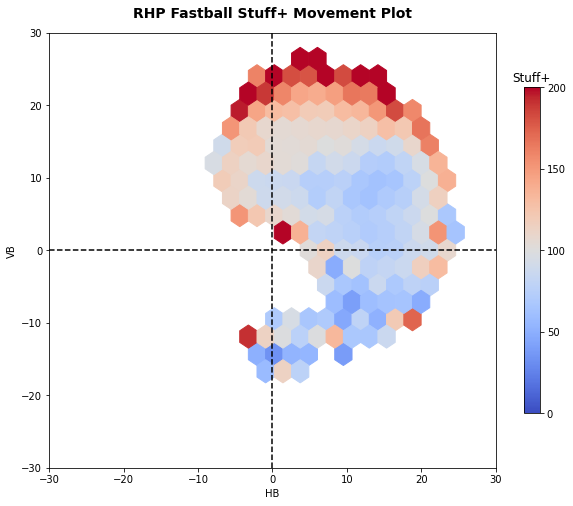

In [16]:
plt.figure(figsize = (10, 8))
plt.hexbin(rhp_fb['pfx_x'], rhp_fb['pfx_z'], C = rhp_fb['Stuff+'], cmap = 'coolwarm', 
           mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .75)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Fastball Stuff+ Movement Plot', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Fastball Stuff+ Movement Plot

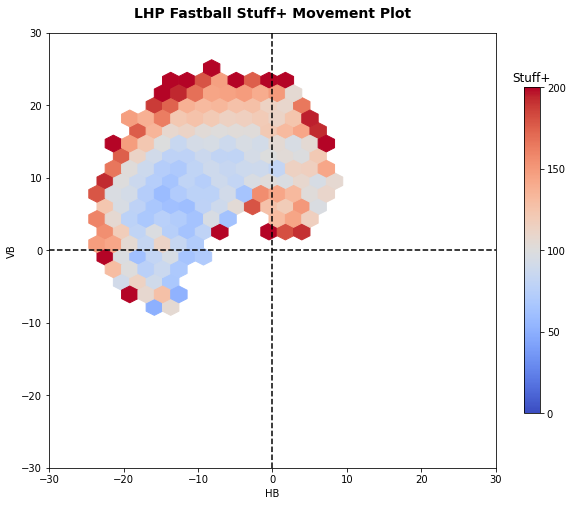

In [17]:
plt.figure(figsize = (10, 8))

plt.hexbin(lhp_fb['pfx_x'], lhp_fb['pfx_z'], C = lhp_fb['Stuff+'], cmap = 'coolwarm',
           mincnt = 10, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .75)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Fastball Stuff+ Movement Plot', fontsize = 14, fontweight = 'bold', pad = 15);

# Breaking Ball Analysis

### Breaking Ball Metrics

In [18]:
good_rhp_bb = rhp_bb.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                           'release_extension', 'Stuff+'].mean()
bb_r_pitches = rhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_rhp_bb = pd.merge(good_rhp_bb, bb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


good_lhp_bb = lhp_bb.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                           'release_extension', 'Stuff+'].mean()
bb_l_pitches = lhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_lhp_bb = pd.merge(good_lhp_bb, bb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

bb_avg = pd.concat([avg_rhp_bb, avg_lhp_bb], ignore_index = True)
bb_avg.insert(2, 'n_pitches', bb_avg.pop('n_pitches'))
bb_avg.round(1).head(8)

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,SL,R,194105,85.0,-6.1,1.8,1.9,5.7,6.3,110.8
1,FC,R,68260,89.6,-2.8,8.2,1.8,5.9,6.3,84.8
2,CU,R,77378,79.2,-9.6,-9.4,1.7,6.0,6.2,86.4
3,KC,R,23629,81.6,-8.0,-11.3,1.8,5.9,6.3,99.5
4,CU,L,34981,77.9,8.8,-8.1,-1.9,6.0,6.2,90.3
5,FC,L,28108,86.9,1.7,7.8,-2.1,5.8,6.2,78.9
6,SL,L,65526,84.2,5.5,1.6,-2.0,5.9,6.3,115.1
7,KC,L,4690,79.3,3.8,-7.9,-1.7,6.3,6.1,88.3


### Above Average Breaking Ball Metrics

In [19]:
abv_rhp_bb = bbr_stufftable.loc[bbr_stufftable['Stuff+'] > 100]
abv_lhp_bb = bbl_stufftable.loc[bbl_stufftable['Stuff+'] > 100]

great_rhp_bb = abv_rhp_bb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
bb_r_pitches = abv_rhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_rhp_bb = pd.merge(great_rhp_bb, bb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


great_lhp_bb = abv_lhp_bb.groupby(['pitch_type', 'p_throws'], 
                                  as_index = False, 
                                  sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                                'release_extension', 'Stuff+'].mean()
bb_l_pitches = abv_lhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_lhp_bb = pd.merge(great_lhp_bb, bb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

bb_abv = pd.concat([abv_rhp_bb, abv_lhp_bb], ignore_index = True)
bb_abv.insert(2, 'n_pitches', bb_abv.pop('n_pitches'))
bb_abv.round(1).head(8)

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,KC,R,10301,83.6,-8.1,-9.2,2.0,5.8,6.3,122.5
1,SL,R,119505,85.5,-6.0,1.8,1.9,5.8,6.3,123.2
2,CU,R,17987,80.7,-10.0,-7.6,1.7,5.8,6.3,121.3
3,FC,R,12456,89.1,-3.7,5.9,1.7,5.8,6.3,111.5
4,FC,L,2894,87.6,2.1,3.4,-2.1,5.8,6.1,131.3
5,SL,L,41086,84.7,5.2,1.5,-1.9,5.9,6.4,129.5
6,CU,L,11517,78.7,7.6,-7.2,-1.6,6.1,6.3,118.7
7,KC,L,1669,81.5,0.6,-1.8,-2.1,6.2,6.0,116.7


### Below Average Breaking Ball Metrics

In [20]:
blw_rhp_bb = bbr_stufftable.loc[bbr_stufftable['Stuff+'] < 100]
blw_lhp_bb = bbl_stufftable.loc[bbl_stufftable['Stuff+'] < 100]

poor_rhp_bb = blw_rhp_bb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                               'release_extension', 'Stuff+'].mean()
bb_r_pitches = blw_rhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_rhp_bb = pd.merge(poor_rhp_bb, bb_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


poor_lhp_bb = blw_lhp_bb.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 'release_pos_z', 
                                               'release_extension', 'Stuff+'].mean()
bb_l_pitches = blw_lhp_bb.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_lhp_bb = pd.merge(poor_lhp_bb, bb_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

bb_blw = pd.concat([blw_rhp_bb, blw_lhp_bb], ignore_index = True)
bb_blw.insert(2, 'n_pitches', bb_blw.pop('n_pitches'))
bb_blw.round(1).head(8)

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,CU,R,48183,78.6,-9.2,-10.0,1.7,6.0,6.2,73.8
1,SL,R,58410,83.9,-6.7,2.0,2.0,5.6,6.3,87.1
2,FC,R,51145,89.4,-2.3,8.6,1.9,5.9,6.3,77.5
3,KC,R,12024,80.2,-8.0,-12.3,1.7,6.0,6.3,79.5
4,SL,L,17917,82.9,6.2,1.2,-2.1,5.8,6.1,84.3
5,FC,L,23638,86.9,1.4,8.4,-2.0,5.9,6.1,73.7
6,CU,L,18955,77.7,8.8,-9.1,-1.8,5.9,6.2,74.3
7,KC,L,2629,78.6,5.8,-11.1,-1.6,6.3,6.1,70.6


### Top Breaking Ball Stuff+

In [21]:
bb_stufftable.sort_values(by = 'Stuff+', ascending = False).head(10)

,player_name,year,p_throws,n_pitches,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
677,"Glasnow, Tyler",2021,R,183,CU,83.5,-4.6,-17.5,1.5,6.3,7.2,214.5
2051,"deGrom, Jacob",2021,R,409,SL,91.6,-4.7,3.5,1.1,5.5,6.8,209.9
487,"Díaz, Edwin",2022,R,514,SL,90.8,-1.5,4.3,2.2,5.1,7.1,202.2
28,"Alvarado, José",2021,L,170,FC,94.1,1.3,5.1,-1.0,6.4,6.7,199.1
30,"Alvarado, José",2022,L,372,FC,93.8,1.9,5.6,-1.2,6.5,6.7,193.2
112,"Chafin, Andrew",2021,L,250,SL,82.5,1.1,-1.8,-1.6,6.3,6.6,189.6
789,"Helsley, Ryan",2022,R,293,SL,89.2,-4.6,2.2,0.5,6.0,6.7,187.0
113,"Chafin, Andrew",2022,L,275,SL,82.9,0.3,-0.6,-1.9,6.2,6.5,185.8
2053,"deGrom, Jacob",2022,R,369,SL,92.6,-3.6,5.2,1.5,5.6,6.6,184.5
797,"Hendriks, Liam",2021,R,235,SL,89.0,-1.9,3.2,1.7,5.9,6.9,181.2


### RHP Breaking Ball Stuff+ Movement Plot

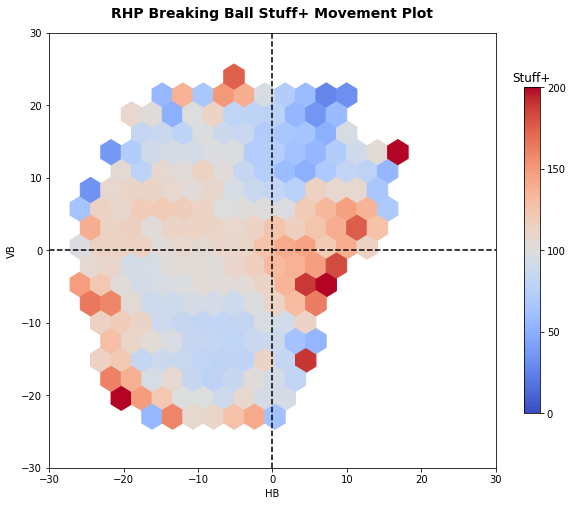

In [22]:
plt.figure(figsize = (10, 8))

plt.hexbin(rhp_bb['pfx_x'], rhp_bb['pfx_z'], C = rhp_bb['Stuff+'],cmap='coolwarm',
           mincnt = 3, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .75)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Breaking Ball Stuff+ Movement Plot', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Breaking Ball Stuff+ Movement Plot

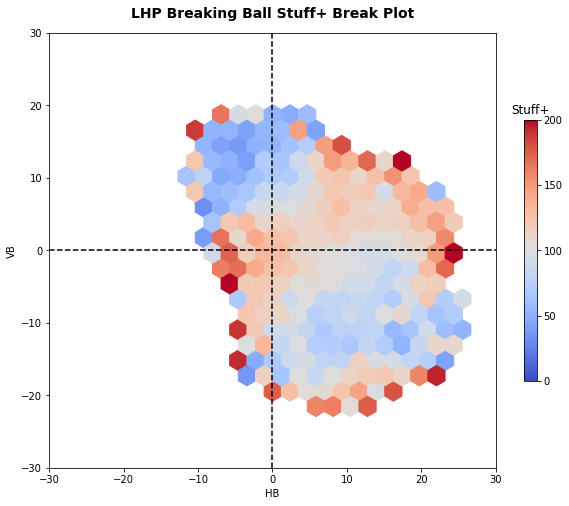

In [23]:
plt.figure(figsize = (10, 8))

plt.hexbin(lhp_bb['pfx_x'], lhp_bb['pfx_z'], C = lhp_bb['Stuff+'],cmap='coolwarm', 
           mincnt = 3, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .6)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Breaking Ball Stuff+ Break Plot', fontsize = 14, fontweight = 'bold', pad = 15);

# Off Speed Analysis

### Off Speed Metrics

In [24]:
good_rhp_os = rhp_os.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                           'release_pos_z', 'release_extension', 'Stuff+'].mean()
os_r_pitches = rhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_rhp_os = pd.merge(good_rhp_os, os_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

good_lhp_os = lhp_os.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                             sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                           'release_pos_z', 'release_extension', 'Stuff+'].mean()

os_l_pitches = lhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
avg_lhp_os = pd.merge(good_lhp_os, os_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

os_avg = pd.concat([avg_rhp_os, avg_lhp_os], ignore_index = True)
os_avg.insert(2, 'n_pitches', os_avg.pop('n_pitches'))
os_avg.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,CH,R,101035,85.8,14.0,6.1,1.9,5.8,6.3,96.4
1,FS,R,20345,86.5,11.0,3.9,1.7,5.9,6.3,118.0
2,CH,L,56642,83.8,-14.1,7.3,-2.0,5.8,6.3,99.8
3,FS,L,958,83.9,-8.6,4.0,-1.7,5.8,6.6,113.9


### Above Average Off Speed Metrics

In [25]:
abv_rhp_os = osr_stufftable.loc[osr_stufftable['Stuff+'] > 100]
abv_lhp_os = osl_stufftable.loc[osl_stufftable['Stuff+'] > 100]

great_rhp_os = abv_rhp_os.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                                   sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                                 'release_pos_z', 'release_extension', 'Stuff+'].mean()
os_r_pitches = abv_rhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_rhp_os = pd.merge(great_rhp_os, os_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


great_lhp_os = abv_lhp_os.groupby(['pitch_type', 'p_throws'], 
                             as_index = False, 
                                   sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                                 'release_pos_z', 'release_extension', 'Stuff+'].mean()
os_l_pitches = abv_lhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
abv_lhp_os = pd.merge(great_lhp_os, os_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

os_abv = pd.concat([abv_rhp_os, abv_lhp_os], ignore_index = True)
os_abv.insert(2, 'n_pitches', os_abv.pop('n_pitches'))
os_abv.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,CH,R,38681,85.9,14.6,5.7,1.9,5.8,6.4,116.3
1,FS,R,13143,86.9,10.0,3.9,1.6,6.0,6.4,130.5
2,CH,L,22128,84.1,-14.0,7.5,-2.0,5.9,6.2,118.4
3,FS,L,111,88.4,-2.7,-2.7,-0.4,6.1,7.4,235.4


### Below Average Off Speed Metrics

In [26]:
blw_rhp_os = osr_stufftable.loc[osr_stufftable['Stuff+'] < 100]
blw_lhp_os = osl_stufftable.loc[osl_stufftable['Stuff+'] < 100]

poor_rhp_os = blw_rhp_os.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                               'release_pos_z', 'release_extension', 'Stuff+'].mean()
os_r_pitches = blw_rhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_rhp_os = pd.merge(poor_rhp_os, os_r_pitches, how = 'right', on = ['pitch_type', 'p_throws'])


poor_lhp_os = blw_lhp_os.groupby(['pitch_type', 'p_throws'], 
                                 as_index = False, 
                                 sort = False)['velo', 'pfx_x', 'pfx_z', 'release_pos_x', 
                                               'release_pos_z', 'release_extension', 'Stuff+'].mean()
os_l_pitches = blw_lhp_os.groupby(['pitch_type', 'p_throws'], as_index = False, sort = False)['n_pitches'].sum()
blw_lhp_os = pd.merge(poor_lhp_os, os_l_pitches, how = 'right', on = ['pitch_type', 'p_throws'])

os_blw = pd.concat([blw_rhp_os, blw_lhp_os], ignore_index = True)
os_blw.insert(2, 'n_pitches', os_blw.pop('n_pitches'))
os_blw.round(1).head()

,pitch_type,p_throws,n_pitches,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
0,CH,R,43649,86.2,14.0,6.6,1.9,5.8,6.3,80.4
1,FS,R,4564,86.4,12.0,5.9,1.7,5.8,6.2,86.5
2,CH,L,27171,84.1,-14.4,6.5,-2.1,5.7,6.2,82.8
3,FS,L,514,82.9,-10.8,3.8,-2.0,5.6,6.6,95.6


### Top Off Speed Stuff+

In [27]:
os_stufftable.sort_values(by = 'Stuff+', ascending = False).head(10)

,player_name,year,p_throws,n_pitches,pitch_type,velo,pfx_x,pfx_z,release_pos_x,release_pos_z,release_extension,Stuff+
56,"Chapman, Aroldis",2021,L,111,FS,88.4,-2.7,-2.7,-0.4,6.1,7.4,235.4
66,"Bautista, Félix",2022,R,256,FS,88.5,7.5,6.8,0.9,7.0,6.4,189.3
528,"Leiter Jr., Mark",2022,R,237,FS,84.2,6.4,4.5,1.2,5.8,6.6,170.9
659,"Ohtani, Shohei",2022,R,310,FS,89.3,5.5,2.5,2.1,6.1,6.9,169.1
658,"Ohtani, Shohei",2021,R,366,FS,88.1,4.9,2.4,1.8,6.2,6.8,162.6
618,"Montas, Frankie",2021,R,677,FS,87.5,11.5,3.8,1.2,6.2,6.0,159.5
1004,"deGrom, Jacob",2021,R,109,CH,91.4,14.2,2.8,1.0,5.4,7.0,159.0
642,"Neris, Hector",2022,R,305,FS,85.1,10.7,-0.7,1.6,6.1,6.2,158.4
446,"Iglesias, Raisel",2021,R,254,CH,89.4,17.2,3.8,1.9,5.5,6.1,156.3
213,"Moore, Matt",2022,L,196,CH,85.0,-17.1,8.7,-1.4,6.4,6.2,155.7


### RHP Off Speed Stuff+ Movement Plot

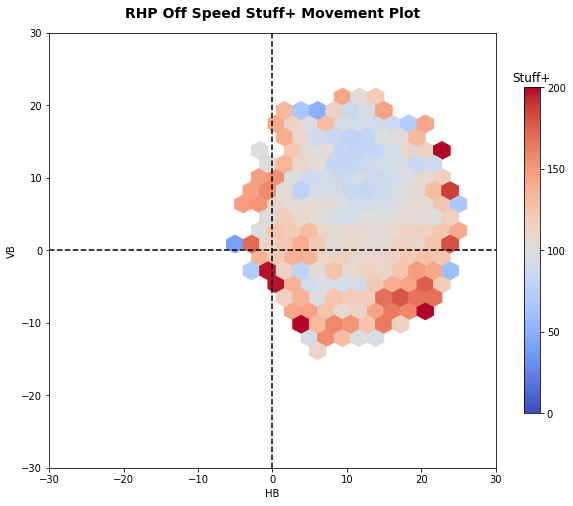

In [28]:
plt.figure(figsize = (10, 8))

plt.hexbin(rhp_os['pfx_x'], rhp_os['pfx_z'], C = rhp_os['Stuff+'], cmap = 'coolwarm',
           mincnt = 5, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .75)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('RHP Off Speed Stuff+ Movement Plot', fontsize = 14, fontweight = 'bold', pad = 15);

### LHP Off Speed Stuff+ Movement Plot

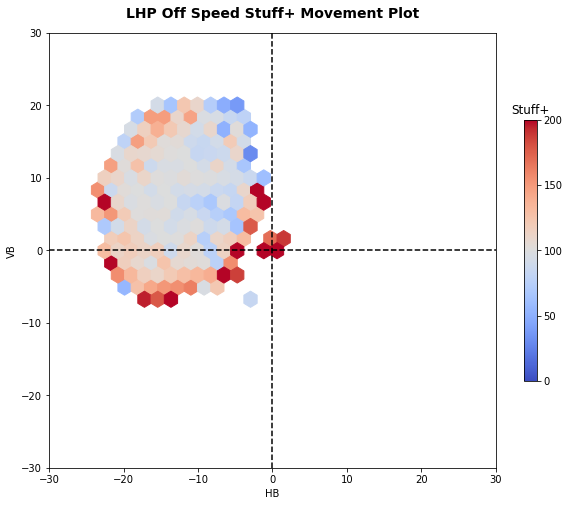

In [29]:
plt.figure(figsize = (10, 8))

plt.hexbin(lhp_os['pfx_x'], lhp_os['pfx_z'], C = lhp_os['Stuff+'], cmap = 'coolwarm',
           mincnt = 5, gridsize = 20)
cb = plt.colorbar(ticks = [0, 50, 100, 150, 200], shrink = .6)
cb.ax.set_title('Stuff+'), plt.clim(0, 200)
plt.xlabel('HB'), plt.ylabel('VB'), plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black', ls = '--'), plt.axvline(0, color = 'black', ls = '--')
plt.title('LHP Off Speed Stuff+ Movement Plot', fontsize = 14, fontweight = 'bold', pad = 15);